<a href="https://colab.research.google.com/github/tomaszpionka/ds-project/blob/main/cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [194]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

import warnings

warnings.filterwarnings('ignore')

data = 'https://raw.githubusercontent.com/Bladefidz/machine-learning-tutorials/master/decision-tree/dataset/car-evaluation/car.csv'

df = pd.read_csv(data)
df.head()

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

df.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [195]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [238]:
df['class'].value_counts()
from sklearn.model_selection import train_test_split
# !pip install category_encoders
import category_encoders as ce
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
#import relevant packages
from sklearn import tree
import matplotlib.pyplot as plt
#import relevant functions
from sklearn.tree import export_text
#import the relevant packages
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

#extract features and target variables
X = df.drop(['class'], axis=1)
y = df["class"]
#save the feature name and target variables
feature_names = X.columns
labels = y.unique()
#split the dataset

custom_depth = 15

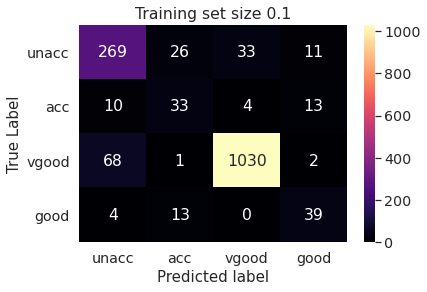

<Figure size 720x504 with 0 Axes>


training set size 0.1
              precision    recall  f1-score   support

         acc       0.77      0.79      0.78       339
        good       0.45      0.55      0.50        60
       unacc       0.97      0.94      0.95      1101
       vgood       0.60      0.70      0.64        56

    accuracy                           0.88      1556
   macro avg       0.70      0.74      0.72      1556
weighted avg       0.89      0.88      0.88      1556



In [239]:
custom_size = 0.1
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                 train_size = custom_size,
                                                 random_state = 42)
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
clf = DecisionTreeClassifier(max_depth = custom_depth, random_state = 42)
clf.fit(X_train, y_train)
#plt the figure, setting a black background
# plt.figure(figsize=(30,10), facecolor ='k')
# #create the tree plot
# a = tree.plot_tree(clf,
#                    #use the feature names stored
#                    feature_names = feature_names,
#                    #use the class names stored
#                    class_names = labels,
#                    rounded = True,
#                    filled = True,
#                    fontsize=14)
# #show the plot
# plt.show()
#export the decision rules
tree_rules = export_text(clf,
                        feature_names = list(feature_names))
#print the result
# print(tree_rules)
test_pred_decision_tree = clf.predict(X_test)

#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,  
                                            test_pred_decision_tree)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title("Training set size " + str(custom_size))
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['']+labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()
# metrics.accuracy_score(y_test, test_pred_decision_tree)
# #get the precision score
# precision = metrics.precision_score(y_test,
#                                    test_pred_decision_tree, 
#                                    average=None)
# #turn it into a dataframe
# precision_results = pd.DataFrame(precision, index=labels)
# #rename the results column
# precision_results.rename(columns={0:'precision'}, inplace =True)
# precision_results

# recall = metrics.recall_score(y_test, test_pred_decision_tree, 
#                               average =None)
# recall_results = pd.DataFrame(recall, index= labels)
# recall_results.rename(columns ={0:'Recall'}, inplace =True)
# recall_results

# f1 = metrics.f1_score(y_test, test_pred_decision_tree, average=None)
# f1_results = pd.DataFrame(f1, index=labels)

# f1_results.rename(columns={0:'f1'}, inplace=True)
# f1_results
print("\n" + "training set size " + str(custom_size) + "\n" + metrics.classification_report(y_test,
                                    test_pred_decision_tree))

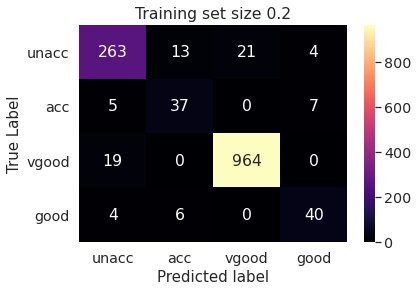

<Figure size 720x504 with 0 Axes>


training set size 0.2
              precision    recall  f1-score   support

         acc       0.90      0.87      0.89       301
        good       0.66      0.76      0.70        49
       unacc       0.98      0.98      0.98       983
       vgood       0.78      0.80      0.79        50

    accuracy                           0.94      1383
   macro avg       0.83      0.85      0.84      1383
weighted avg       0.94      0.94      0.94      1383



In [240]:
custom_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                 train_size = custom_size,
                                                 random_state = 42)
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
clf = DecisionTreeClassifier(max_depth = custom_depth, random_state = 42)
clf.fit(X_train, y_train)
#plt the figure, setting a black background
# plt.figure(figsize=(30,10), facecolor ='k')
# #create the tree plot
# a = tree.plot_tree(clf,
#                    #use the feature names stored
#                    feature_names = feature_names,
#                    #use the class names stored
#                    class_names = labels,
#                    rounded = True,
#                    filled = True,
#                    fontsize=14)
# #show the plot
# plt.show()
#export the decision rules
tree_rules = export_text(clf,
                        feature_names = list(feature_names))
#print the result
# print(tree_rules)
test_pred_decision_tree = clf.predict(X_test)

#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,  
                                            test_pred_decision_tree)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title("Training set size " + str(custom_size))
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['']+labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()
# metrics.accuracy_score(y_test, test_pred_decision_tree)
# #get the precision score
# precision = metrics.precision_score(y_test,
#                                    test_pred_decision_tree, 
#                                    average=None)
# #turn it into a dataframe
# precision_results = pd.DataFrame(precision, index=labels)
# #rename the results column
# precision_results.rename(columns={0:'precision'}, inplace =True)
# precision_results

# recall = metrics.recall_score(y_test, test_pred_decision_tree, 
#                               average =None)
# recall_results = pd.DataFrame(recall, index= labels)
# recall_results.rename(columns ={0:'Recall'}, inplace =True)
# recall_results

# f1 = metrics.f1_score(y_test, test_pred_decision_tree, average=None)
# f1_results = pd.DataFrame(f1, index=labels)

# f1_results.rename(columns={0:'f1'}, inplace=True)
# f1_results
print("\n" + "training set size " + str(custom_size) + "\n" + metrics.classification_report(y_test,
                                    test_pred_decision_tree))

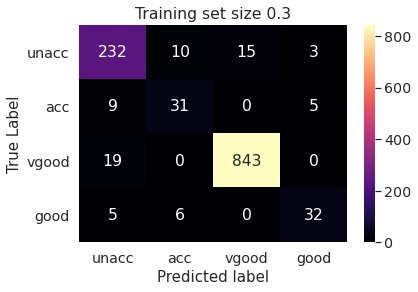

<Figure size 720x504 with 0 Axes>


training set size 0.3
              precision    recall  f1-score   support

         acc       0.88      0.89      0.88       260
        good       0.66      0.69      0.67        45
       unacc       0.98      0.98      0.98       862
       vgood       0.80      0.74      0.77        43

    accuracy                           0.94      1210
   macro avg       0.83      0.83      0.83      1210
weighted avg       0.94      0.94      0.94      1210



In [241]:
custom_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                 train_size = custom_size,
                                                 random_state = 42)
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
clf = DecisionTreeClassifier(max_depth = custom_depth, random_state = 42)
clf.fit(X_train, y_train)
#plt the figure, setting a black background
# plt.figure(figsize=(30,10), facecolor ='k')
# #create the tree plot
# a = tree.plot_tree(clf,
#                    #use the feature names stored
#                    feature_names = feature_names,
#                    #use the class names stored
#                    class_names = labels,
#                    rounded = True,
#                    filled = True,
#                    fontsize=14)
# #show the plot
# plt.show()
#export the decision rules
tree_rules = export_text(clf,
                        feature_names = list(feature_names))
#print the result
# print(tree_rules)
test_pred_decision_tree = clf.predict(X_test)

#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,  
                                            test_pred_decision_tree)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title("Training set size " + str(custom_size))
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['']+labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()
# metrics.accuracy_score(y_test, test_pred_decision_tree)
# #get the precision score
# precision = metrics.precision_score(y_test,
#                                    test_pred_decision_tree, 
#                                    average=None)
# #turn it into a dataframe
# precision_results = pd.DataFrame(precision, index=labels)
# #rename the results column
# precision_results.rename(columns={0:'precision'}, inplace =True)
# precision_results

# recall = metrics.recall_score(y_test, test_pred_decision_tree, 
#                               average =None)
# recall_results = pd.DataFrame(recall, index= labels)
# recall_results.rename(columns ={0:'Recall'}, inplace =True)
# recall_results

# f1 = metrics.f1_score(y_test, test_pred_decision_tree, average=None)
# f1_results = pd.DataFrame(f1, index=labels)

# f1_results.rename(columns={0:'f1'}, inplace=True)
# f1_results
print("\n" + "training set size " + str(custom_size) + "\n" + metrics.classification_report(y_test,
                                    test_pred_decision_tree))

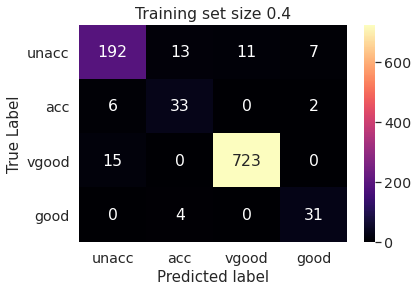

<Figure size 720x504 with 0 Axes>


training set size 0.4
              precision    recall  f1-score   support

         acc       0.90      0.86      0.88       223
        good       0.66      0.80      0.73        41
       unacc       0.99      0.98      0.98       738
       vgood       0.78      0.89      0.83        35

    accuracy                           0.94      1037
   macro avg       0.83      0.88      0.85      1037
weighted avg       0.95      0.94      0.95      1037



In [242]:
custom_size = 0.4
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                 train_size = custom_size,
                                                 random_state = 42)
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
clf = DecisionTreeClassifier(max_depth = custom_depth, random_state = 42)
clf.fit(X_train, y_train)
#plt the figure, setting a black background
# plt.figure(figsize=(30,10), facecolor ='k')
# #create the tree plot
# a = tree.plot_tree(clf,
#                    #use the feature names stored
#                    feature_names = feature_names,
#                    #use the class names stored
#                    class_names = labels,
#                    rounded = True,
#                    filled = True,
#                    fontsize=14)
# #show the plot
# plt.show()
#export the decision rules
tree_rules = export_text(clf,
                        feature_names = list(feature_names))
#print the result
# print(tree_rules)
test_pred_decision_tree = clf.predict(X_test)

#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,  
                                            test_pred_decision_tree)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title("Training set size " + str(custom_size))
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['']+labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()
# metrics.accuracy_score(y_test, test_pred_decision_tree)
# #get the precision score
# precision = metrics.precision_score(y_test,
#                                    test_pred_decision_tree, 
#                                    average=None)
# #turn it into a dataframe
# precision_results = pd.DataFrame(precision, index=labels)
# #rename the results column
# precision_results.rename(columns={0:'precision'}, inplace =True)
# precision_results

# recall = metrics.recall_score(y_test, test_pred_decision_tree, 
#                               average =None)
# recall_results = pd.DataFrame(recall, index= labels)
# recall_results.rename(columns ={0:'Recall'}, inplace =True)
# recall_results

# f1 = metrics.f1_score(y_test, test_pred_decision_tree, average=None)
# f1_results = pd.DataFrame(f1, index=labels)

# f1_results.rename(columns={0:'f1'}, inplace=True)
# f1_results
print("\n" + "training set size " + str(custom_size) + "\n" + metrics.classification_report(y_test,
                                    test_pred_decision_tree))

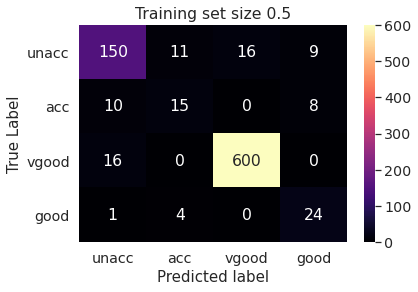

<Figure size 720x504 with 0 Axes>


training set size 0.5
              precision    recall  f1-score   support

         acc       0.85      0.81      0.83       186
        good       0.50      0.45      0.48        33
       unacc       0.97      0.97      0.97       616
       vgood       0.59      0.83      0.69        29

    accuracy                           0.91       864
   macro avg       0.73      0.77      0.74       864
weighted avg       0.92      0.91      0.91       864



In [243]:
custom_size = 0.5
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                 train_size = custom_size,
                                                 random_state = 42)
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
clf = DecisionTreeClassifier(max_depth = custom_depth, random_state = 42)
clf.fit(X_train, y_train)
#plt the figure, setting a black background
# plt.figure(figsize=(30,10), facecolor ='k')
# #create the tree plot
# a = tree.plot_tree(clf,
#                    #use the feature names stored
#                    feature_names = feature_names,
#                    #use the class names stored
#                    class_names = labels,
#                    rounded = True,
#                    filled = True,
#                    fontsize=14)
# #show the plot
# plt.show()
#export the decision rules
tree_rules = export_text(clf,
                        feature_names = list(feature_names))
#print the result
# print(tree_rules)
test_pred_decision_tree = clf.predict(X_test)

#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,  
                                            test_pred_decision_tree)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title("Training set size " + str(custom_size))
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['']+labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()
# metrics.accuracy_score(y_test, test_pred_decision_tree)
# #get the precision score
# precision = metrics.precision_score(y_test,
#                                    test_pred_decision_tree, 
#                                    average=None)
# #turn it into a dataframe
# precision_results = pd.DataFrame(precision, index=labels)
# #rename the results column
# precision_results.rename(columns={0:'precision'}, inplace =True)
# precision_results

# recall = metrics.recall_score(y_test, test_pred_decision_tree, 
#                               average =None)
# recall_results = pd.DataFrame(recall, index= labels)
# recall_results.rename(columns ={0:'Recall'}, inplace =True)
# recall_results

# f1 = metrics.f1_score(y_test, test_pred_decision_tree, average=None)
# f1_results = pd.DataFrame(f1, index=labels)

# f1_results.rename(columns={0:'f1'}, inplace=True)
# f1_results
print("\n" + "training set size " + str(custom_size) + "\n" + metrics.classification_report(y_test,
                                    test_pred_decision_tree))

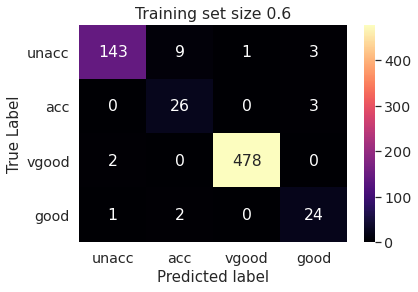

<Figure size 720x504 with 0 Axes>


training set size 0.6
              precision    recall  f1-score   support

         acc       0.98      0.92      0.95       156
        good       0.70      0.90      0.79        29
       unacc       1.00      1.00      1.00       480
       vgood       0.80      0.89      0.84        27

    accuracy                           0.97       692
   macro avg       0.87      0.92      0.89       692
weighted avg       0.97      0.97      0.97       692



In [244]:
custom_size = 0.6
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                 train_size = custom_size,
                                                 random_state = 42)
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
clf = DecisionTreeClassifier(max_depth = custom_depth, random_state = 42)
clf.fit(X_train, y_train)
#plt the figure, setting a black background
# plt.figure(figsize=(30,10), facecolor ='k')
# #create the tree plot
# a = tree.plot_tree(clf,
#                    #use the feature names stored
#                    feature_names = feature_names,
#                    #use the class names stored
#                    class_names = labels,
#                    rounded = True,
#                    filled = True,
#                    fontsize=14)
# #show the plot
# plt.show()
#export the decision rules
tree_rules = export_text(clf,
                        feature_names = list(feature_names))
#print the result
# print(tree_rules)
test_pred_decision_tree = clf.predict(X_test)

#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,  
                                            test_pred_decision_tree)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title("Training set size " + str(custom_size))
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['']+labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()
# metrics.accuracy_score(y_test, test_pred_decision_tree)
# #get the precision score
# precision = metrics.precision_score(y_test,
#                                    test_pred_decision_tree, 
#                                    average=None)
# #turn it into a dataframe
# precision_results = pd.DataFrame(precision, index=labels)
# #rename the results column
# precision_results.rename(columns={0:'precision'}, inplace =True)
# precision_results

# recall = metrics.recall_score(y_test, test_pred_decision_tree, 
#                               average =None)
# recall_results = pd.DataFrame(recall, index= labels)
# recall_results.rename(columns ={0:'Recall'}, inplace =True)
# recall_results

# f1 = metrics.f1_score(y_test, test_pred_decision_tree, average=None)
# f1_results = pd.DataFrame(f1, index=labels)

# f1_results.rename(columns={0:'f1'}, inplace=True)
# f1_results
print("\n" + "training set size " + str(custom_size) + "\n" + metrics.classification_report(y_test,
                                    test_pred_decision_tree))

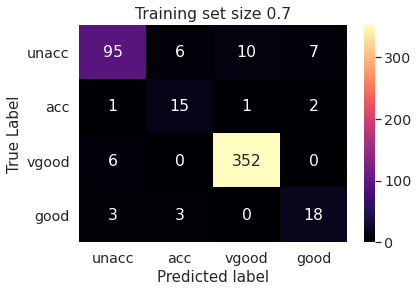

<Figure size 720x504 with 0 Axes>


training set size 0.7
              precision    recall  f1-score   support

         acc       0.90      0.81      0.85       118
        good       0.62      0.79      0.70        19
       unacc       0.97      0.98      0.98       358
       vgood       0.67      0.75      0.71        24

    accuracy                           0.92       519
   macro avg       0.79      0.83      0.81       519
weighted avg       0.93      0.92      0.93       519



In [245]:
custom_size = 0.7
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                 train_size = custom_size,
                                                 random_state = 42)
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
clf = DecisionTreeClassifier(max_depth = custom_depth, random_state = 42)
clf.fit(X_train, y_train)
#plt the figure, setting a black background
# plt.figure(figsize=(30,10), facecolor ='k')
# #create the tree plot
# a = tree.plot_tree(clf,
#                    #use the feature names stored
#                    feature_names = feature_names,
#                    #use the class names stored
#                    class_names = labels,
#                    rounded = True,
#                    filled = True,
#                    fontsize=14)
# #show the plot
# plt.show()
#export the decision rules
tree_rules = export_text(clf,
                        feature_names = list(feature_names))
#print the result
# print(tree_rules)
test_pred_decision_tree = clf.predict(X_test)

#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,  
                                            test_pred_decision_tree)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title("Training set size " + str(custom_size))
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['']+labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()
# metrics.accuracy_score(y_test, test_pred_decision_tree)
# #get the precision score
# precision = metrics.precision_score(y_test,
#                                    test_pred_decision_tree, 
#                                    average=None)
# #turn it into a dataframe
# precision_results = pd.DataFrame(precision, index=labels)
# #rename the results column
# precision_results.rename(columns={0:'precision'}, inplace =True)
# precision_results

# recall = metrics.recall_score(y_test, test_pred_decision_tree, 
#                               average =None)
# recall_results = pd.DataFrame(recall, index= labels)
# recall_results.rename(columns ={0:'Recall'}, inplace =True)
# recall_results

# f1 = metrics.f1_score(y_test, test_pred_decision_tree, average=None)
# f1_results = pd.DataFrame(f1, index=labels)

# f1_results.rename(columns={0:'f1'}, inplace=True)
# f1_results
print("\n" + "training set size " + str(custom_size) + "\n" + metrics.classification_report(y_test,
                                    test_pred_decision_tree))

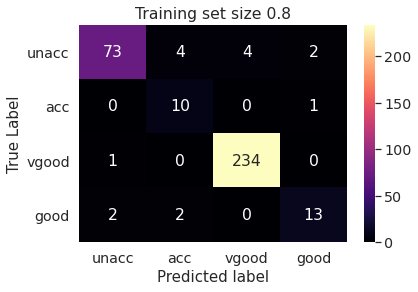

<Figure size 720x504 with 0 Axes>


training set size 0.8
              precision    recall  f1-score   support

         acc       0.96      0.88      0.92        83
        good       0.62      0.91      0.74        11
       unacc       0.98      1.00      0.99       235
       vgood       0.81      0.76      0.79        17

    accuracy                           0.95       346
   macro avg       0.85      0.89      0.86       346
weighted avg       0.96      0.95      0.95       346



In [246]:
custom_size = 0.8
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                 train_size = custom_size,
                                                 random_state = 42)
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
clf = DecisionTreeClassifier(max_depth = custom_depth, random_state = 42)
clf.fit(X_train, y_train)
#plt the figure, setting a black background
# plt.figure(figsize=(30,10), facecolor ='k')
# #create the tree plot
# a = tree.plot_tree(clf,
#                    #use the feature names stored
#                    feature_names = feature_names,
#                    #use the class names stored
#                    class_names = labels,
#                    rounded = True,
#                    filled = True,
#                    fontsize=14)
# #show the plot
# plt.show()
#export the decision rules
tree_rules = export_text(clf,
                        feature_names = list(feature_names))
#print the result
# print(tree_rules)
test_pred_decision_tree = clf.predict(X_test)

#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,  
                                            test_pred_decision_tree)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title("Training set size " + str(custom_size))
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['']+labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()
# metrics.accuracy_score(y_test, test_pred_decision_tree)
# #get the precision score
# precision = metrics.precision_score(y_test,
#                                    test_pred_decision_tree, 
#                                    average=None)
# #turn it into a dataframe
# precision_results = pd.DataFrame(precision, index=labels)
# #rename the results column
# precision_results.rename(columns={0:'precision'}, inplace =True)
# precision_results

# recall = metrics.recall_score(y_test, test_pred_decision_tree, 
#                               average =None)
# recall_results = pd.DataFrame(recall, index= labels)
# recall_results.rename(columns ={0:'Recall'}, inplace =True)
# recall_results

# f1 = metrics.f1_score(y_test, test_pred_decision_tree, average=None)
# f1_results = pd.DataFrame(f1, index=labels)

# f1_results.rename(columns={0:'f1'}, inplace=True)
# f1_results
print("\n" + "training set size " + str(custom_size) + "\n" + metrics.classification_report(y_test,
                                    test_pred_decision_tree))

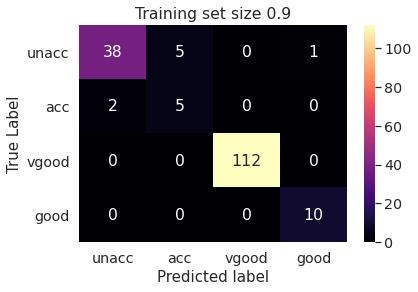

<Figure size 720x504 with 0 Axes>


training set size 0.9
              precision    recall  f1-score   support

         acc       0.95      0.86      0.90        44
        good       0.50      0.71      0.59         7
       unacc       1.00      1.00      1.00       112
       vgood       0.91      1.00      0.95        10

    accuracy                           0.95       173
   macro avg       0.84      0.89      0.86       173
weighted avg       0.96      0.95      0.96       173



In [247]:
custom_size = 0.9
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                 train_size = custom_size,
                                                 random_state = 42)
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
clf = DecisionTreeClassifier(max_depth = custom_depth, random_state = 42)
clf.fit(X_train, y_train)
#plt the figure, setting a black background
# plt.figure(figsize=(30,10), facecolor ='k')
# #create the tree plot
# a = tree.plot_tree(clf,
#                    #use the feature names stored
#                    feature_names = feature_names,
#                    #use the class names stored
#                    class_names = labels,
#                    rounded = True,
#                    filled = True,
#                    fontsize=14)
# #show the plot
# plt.show()
#export the decision rules
tree_rules = export_text(clf,
                        feature_names = list(feature_names))
#print the result
# print(tree_rules)
test_pred_decision_tree = clf.predict(X_test)

#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,  
                                            test_pred_decision_tree)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title("Training set size " + str(custom_size))
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['']+labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()
# metrics.accuracy_score(y_test, test_pred_decision_tree)
# #get the precision score
# precision = metrics.precision_score(y_test,
#                                    test_pred_decision_tree, 
#                                    average=None)
# #turn it into a dataframe
# precision_results = pd.DataFrame(precision, index=labels)
# #rename the results column
# precision_results.rename(columns={0:'precision'}, inplace =True)
# precision_results

# recall = metrics.recall_score(y_test, test_pred_decision_tree, 
#                               average =None)
# recall_results = pd.DataFrame(recall, index= labels)
# recall_results.rename(columns ={0:'Recall'}, inplace =True)
# recall_results

# f1 = metrics.f1_score(y_test, test_pred_decision_tree, average=None)
# f1_results = pd.DataFrame(f1, index=labels)

# f1_results.rename(columns={0:'f1'}, inplace=True)
# f1_results
print("\n" + "training set size " + str(custom_size) + "\n" + metrics.classification_report(y_test,
                                    test_pred_decision_tree))